# BIOEN 498 Special Topics: Advanced Controls for Biological Systems
HW1

Sophia Shan

01/31/2024





**1. Problem Description and System Design**


The problem that we want to investigate in this assignment is the influence of the amount of insulin receptor on blood glucose level for type 2 diabetes that originate from adipose tissue.

In terms of control objectives, we want to test the settling time of blood glucose with different amounts of insulin receptors. In addition, we are also curious about the influence of insulin receptor levels on the range of glucose fluctuation.

**2. System Identification**

The SBML model we will use is the insulin signalling in human adipocytes.

The output of our system is the blood glucose concentration, and the system input is the level of insulin receptors.

The effect of insulin receptor increase seems to have non-monotonic effect on blood glucose level in the beginning, but after settling time, the increase of insulin receptor has a negative monotonic effect on blood glucose level.

The reasonable input operating region is roughly 0 - 1000. And the range of outputs that can be achieved is 15 - 50.

In [5]:
!pip install -q controlSBML
!pip install -q tellurium
!pip install numpy==1.24.4

In [7]:
from controlSBML import ControlSBML
import control
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Function that adjust model parameters
def plotModel(model, title="", is_plot=True, input_species=None, times=np.linspace(0, 5, 50), selections=None, figsize=(4,4), **kwargs):
    """
    Plots the simulation with the specified parameter values.

    Parameters
    ----------
    model: str either antimony or URL
    title: str (plot title)
    is_plot: bool
    input_species: str (species used as input if it is not a boundary/fixed species in the model)
    times: array-float (times for simulations)
    selections: list-str (species to plot)
    figsize: int, int (dimensions of the figure)
    kwargs: dict
        key: parameter name
        value: parameter value

    Returns
    -------
    NamedArray
    """
    if "http" in model:
        rr = te.loadSBMLModel(model)
    else:
        rr = te.loada(model)
    if input_species is not None:
        rr.setBoundary(input_species, True)
    if selections is not None:
        new_selections = list(selections)
        if not "time" in selections:
            new_selections.insert(0, "time")
    else:
        new_selections = selections
    for name, value in kwargs.items():
        rr[name] = value
    simulation_results = rr.simulate(times[0], times[-1], len(times), selections=new_selections)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        columns = simulation_results.colnames
        columns = columns[1:]
        for column in columns:
            if column == "time":
                next
            ax.plot(simulation_results[:, 0], simulation_results[column])
        plt.legend(columns)
        ax.set_xlabel("time")
    return simulation_results


In [233]:
URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1304160000/2/BIOMD0000000449_url.xml"
# "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL0911270008/3/BIOMD0000000663_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1304160000/2/BIOMD0000000449_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1504130001/3/BIOMD0000000575_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1608150000/2/BIOMD0000000615_url.xml"

# "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1909250003/2/Varusai2018.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL0912070000/2/BIOMD0000000293_url.xml"
#"https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL1608150000/2/BIOMD0000000615_url.xml"
mod = te.loadSBMLModel(URL)
mod.getFloatingSpeciesIds()

['IR',
 'IRp',
 'IRins',
 'IRip',
 'IRi',
 'IRS1',
 'IRS1p',
 'IRS1p307',
 'IRS1307',
 'X',
 'Xp',
 'PKB',
 'PKB308p',
 'PKB473p',
 'PKB308p473p',
 'mTORC1',
 'mTORC1a',
 'mTORC2',
 'mTORC2a',
 'AS160',
 'AS160p',
 'GLUT4m',
 'GLUT4',
 'S6K',
 'S6Kp',
 'S6',
 'S6p']

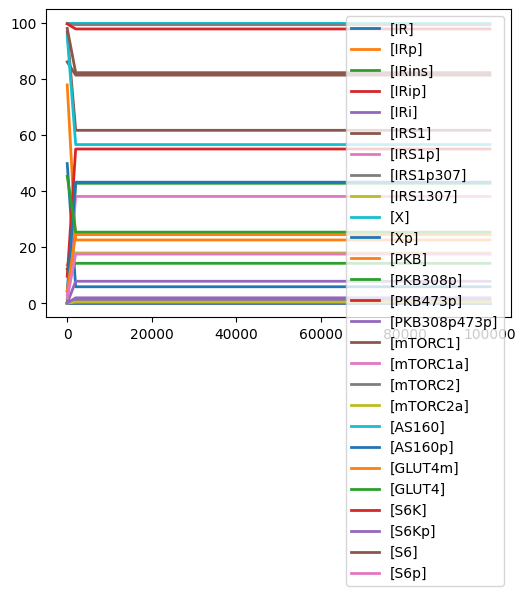

In [234]:
rez = mod.simulate(0, 100000)
mod.plot()

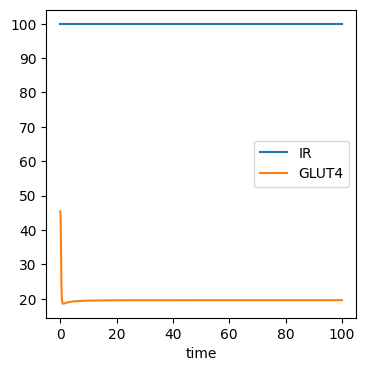

In [257]:
_ = plotModel(URL,  input_species="IR", selections=[ "IR",  "GLUT4"], IR = 100, times=np.linspace(0, 100, 1000))

In [209]:
mod.getAntimony()

'// Created by libAntimony v2.14.0\nfunction Function_for_R8(As, Bs, ModelValue_2, default_compartment)\n  ModelValue_2*As*Bs/default_compartment;\nend\n\nFunction_for_R8 is "Function for R8"\n\nfunction Function_for_R17(Bsyn, ModelValue_7, default_compartment)\n  Bsyn*ln(2)/ModelValue_7/default_compartment;\nend\n\nFunction_for_R17 is "Function for R17"\n\nfunction Function_for_R1(ModelValue_3, default_compartment)\n  ModelValue_3/default_compartment;\nend\n\nFunction_for_R1 is "Function for R1"\n\nfunction Function_for_R5(As, ModelValue_0, ModelValue_8, default_compartment)\n  ModelValue_0*As/ModelValue_8/default_compartment;\nend\n\nFunction_for_R5 is "Function for R5"\n\nfunction Function_for_R9(Bs, ModelValue_7, default_compartment)\n  Bs*ln(2)/ModelValue_7/default_compartment;\nend\n\nFunction_for_R9 is "Function for R9"\n\nfunction Function_for_R2(As, ModelValue_1, default_compartment)\n  ModelValue_1*As/default_compartment;\nend\n\nFunction_for_R2 is "Function for R2"\n\nfuncti

In [250]:
ctlsb = ControlSBML(mod, input_names=["IR"], output_names=["GLUT4"], is_fixed_input_species=True)

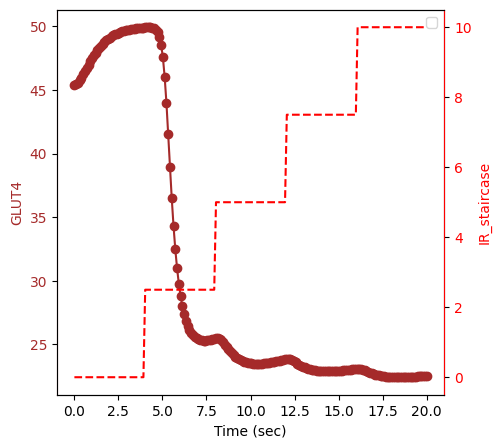

In [259]:
_, builder = ctlsb.plotStaircaseResponse(initial_value=0, final_value=10, num_step=4,
                                         times=np.linspace(0, 20, 200))

**3. Testbed Construction and Control Design**